<a href="https://colab.research.google.com/github/Hodobox/DL_AE/blob/main/DL_Coursework_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning 2021 - Coursework
## Learning to steer!

The aim of this coursework will be for you to design a deep learning architecture to predict steering angle from images. 
You are provided a dataset recorded using a remote control car driving in a small track. 

***Your aim is to design a model that, when given a new image from the track, would produce a steering control that would keep the car on the track.***

You are free to use any architecture you prefer, from what we have seen in class. You can decide to use temporal sequence information or not - the approach you choose is your choice. 

### Hand-in date: Friday 19th of March

### Steps & Hints
* First, load the data and separate into training, validation and test set (you can use cross-validation if you want)
* Write a DataLoader class for the data
* Think about pre-processing of the input? The output? Normalisation or not? 
* Design a network for the task. What layers? How many? Do you want to use an Autoencoder for unsupervised pre-training? An LSTM for encoding temporal dynamics? or just a plain CNN? 
* Choose a loss function for your network
* Select optimiser and training parameters (batch size, learning rate)
* Optimise your model, and tune hyperparameters (especially learning rate, momentum etc)
* Analyse the results on the test data. How to measure success? Look at failure cases. 
* If time allows, go back to drawing board and try a more complex, or better, model. 

### Submission
* submit your work as a colab notebook
* The training cells must be disabled by a flag, such that when running *run all* on your notebook it does
  * load the data
  * load your model 
  * apply the model to the test data
  * analyse and display the results and accuracy 
* Note that you must put your trained model on a github so that your code can download it. 


### Assessment criteria 
* In order to get a pass mark, you will need to demonstrate that you have designed and trained a deep NN to solve the problem, using sensible approach and reasonable efforts to tune hyper-parameters. You have analysed the results. It is NOT necessary to have any level of accuracy (a network that predicts poorly will always yield a pass mark if it is designed, tuned and analysed sensibly). 
* In order to get a good mark, you will show good understanding of the approach and provide a working solution. 
* in order to get a high mark, you will demonstrate a working approach of gradual improvement between different versions of your solution. 
* bonus marks for attempting something original if well motivated - even if it does not yield increased performance. 
* bonus marks for getting high performance, and some more points are to grab for getting the best performance in the class. 

### Notes
* make sure to clearly set aside training, validation and test sets to ensure proper setting of all hyperparameters. 
* I recommend to start with small models that can be easier to train to set a baseline performance before attempting more complex one. 
* Be mindful of the time!

In [ ]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

!ls

# Loading the data
# we will use wget to get the archive
!wget --no-check-certificate "https://www.dropbox.com/s/q7r8739pczoudga/DL_CW_data.zip?dl=1" -O DL_CW_data.zip

# then unzip it locally 
!unzip -o DL_CW_data.zip

Streaming output truncated to the last 5000 lines.
 extracting: DL/images/1315584542Image001343.jpg  
 extracting: DL/images/1315584542Image000417.jpg  
 extracting: DL/images/1315584895Image000924.jpg  
 extracting: DL/images/1315584123Image001306.jpg  
 extracting: DL/images/1315584895Image001039.jpg  
 extracting: DL/images/1315585404Image000899.jpg  
 extracting: DL/images/1315584542Image000742.jpg  
 extracting: DL/images/1315585675Image000158.jpg  
 extracting: DL/images/1315585404Image001115.jpg  
 extracting: DL/images/1315584123Image000747.jpg  
 extracting: DL/images/1315585996Image000666.jpg  
 extracting: DL/images/1315585996Image000986.jpg  
 extracting: DL/images/1315585404Image000587.jpg  
 extracting: DL/images/1315584542Image001346.jpg  
 extracting: DL/images/1315584542Image000931.jpg  
 extracting: DL/images/1315585996Image000667.jpg  
 extracting: DL/images/1315584895Image000735.jpg  
 extracting: DL/images/1315584123Image001050.jpg  
 extracting: DL/images/13155848

                image  throttle  steering
0     Image000001.jpg   32767.0   32767.0
1     Image000002.jpg   32767.0   32767.0
2     Image000002.jpg   32767.0   32767.0
3     Image000003.jpg   32767.0   32767.0
4     Image000003.jpg   32767.0   32767.0
...               ...       ...       ...
2699  Image001349.jpg   46550.0   33548.0
2700  Image001350.jpg   46550.0   33548.0
2701  Image001350.jpg   46550.0   33288.0
2702  Image001351.jpg   46550.0   33288.0
2703  Image001351.jpg   46550.0   33288.0

[2704 rows x 3 columns]


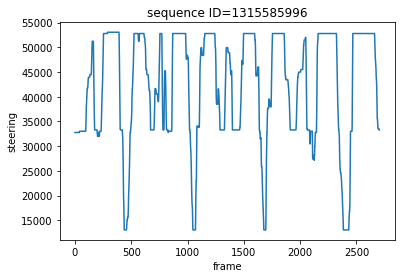

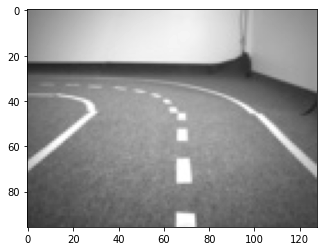

In [ ]:
# The steering data is in the .dat files, it is the third column 
# the first one gives the image file for each frame (it needs to be prefixed with the 
# sequence id)
# Note: Pandas is not needed to load the data, but makes it easy. 

all_sequences=[1315584123, 1315584542, 1315584895, 1315585404, 1315585675, 1315585996]

sequence=all_sequences[5]
frame=1

data = pd.read_csv('DL/control/%i.dat' % sequence, sep='\t', names=['image', 'throttle', 'steering'])
print(data)

# we plot the steering control for one of the sequence. 
plt.plot(data['steering'])
plt.title('sequence ID=%i' % sequence)
plt.ylabel('steering')
plt.xlabel('frame')
plt.show()

# Note that the steering values are in arbitrary units (raw values from the RC car 
# controller)

img = plt.imread('DL/images/%iImage%06i.jpg' % (sequence,frame) )
plt.imshow(img, cmap='gray', vmin=0, vmax=255)